# General Preamble Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

# Additional Import Code for dataset BC

In [2]:
from sklearn.datasets import load_breast_cancer
x, y = load_breast_cancer(return_X_y=True)
print(x, type(x),"\n")
print(y, type(y))

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]] <class 'numpy.ndarray'> 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 

# Question 1
## For the'mean radius' and 'mean perimeter' features, plot histograms separated by the target class (i.e., create one histogram of 'mean radius' for benign tumors and another for malignant tumors). The GaussianNB classifier assumes that continuous features follow a Gaussian (normal) distribution. Based on your plots, does the assumption of a normal distribution appear reasonable for these features within each class?

############ Assignment 3 Question 1 BEGIN ############


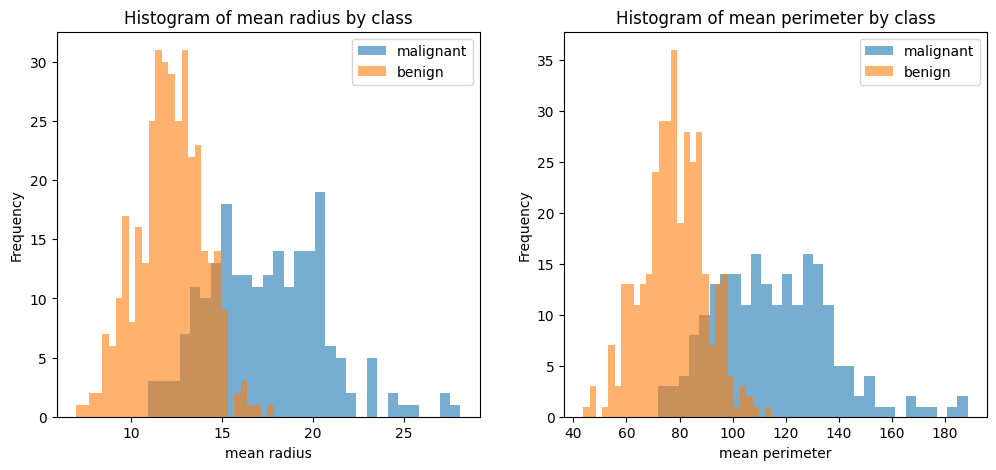

Based on the histograms, both features show some degree of normality within each class, but there may be skewness or deviations from a perfect Gaussian shape, especially for 'mean perimeter'. The GaussianNB assumption is a reasonable approximation, but not perfect.
############# Assignment 3 Question 1 END #############


In [ ]:
print("############ Assignment 3 Question 1 BEGIN ############")
data = load_breast_cancer()
df_bc = pd.DataFrame(x, columns=data.feature_names)
df_bc['target'] = y

# plot histograms for mean radius and mean perimeter (target class)
features = ['mean radius', 'mean perimeter']
target_names = ['malignant', 'benign']
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# mean radius
df_bc[df_bc['target'] == 0][features[0]].plot(
    kind='hist', alpha=0.6, ax=axes[0], label=target_names[0], bins=30
)
df_bc[df_bc['target'] == 1][features[0]].plot(
    kind='hist', alpha=0.6, ax=axes[0], label=target_names[1], bins=30
)
axes[0].set_title(f"histogram of mean radius by class")
axes[0].set_xlabel(features[0])
axes[0].set_ylabel("Frequency")
axes[0].legend()

# mean perimeter
df_bc[df_bc['target'] == 0][features[1]].plot(
    kind='hist', alpha=0.6, ax=axes[1], label=target_names[0], bins=30
)
df_bc[df_bc['target'] == 1][features[1]].plot(
    kind='hist', alpha=0.6, ax=axes[1], label=target_names[1], bins=30
)
axes[1].set_title(f"histogram of mean perimeter by class")
axes[1].set_xlabel(features[1])
axes[1].set_ylabel("Frequency")
axes[1].legend()

plt.show()

print("Based on the histograms, both features show some degree of normality within each class but it is not a perfect Gaussian shape. The GaussianNB assumption is reasonable approximation, but not perfect.")
print("############# Assignment 3 Question 1 END #############")

# Question 2
## The naive assumption assumes that features are independent of each other. Generate a correlation matrix for the numerical features in the dataset. Do you see any highly correlated features? Explain how the model can still perform reasonably well even if this core assumption is violated.

In [ ]:
print("############ Assignment 3 Question 2 BEGIN ############")

# generate a correlation matrix (WIP)

# identify highly correlated features (WIP)

# explain how model performs well even if features aren't independent (WIP)

print("############# Assignment 3 Question 2 END #############")

# Question 3
## Train GaussianNB classifier and report its accuracy on the training and test set. Remember general test/train split and random_state instructions from before.

In [ ]:
print("############ Assignment 3 Question 3 BEGIN ############")

# creating train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, train_size=0.75, random_state=0)

# creating naive bayes model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

# evaluating the model
y_pred = gnb.predict(x_test)
print(f"Accuracy (train set): {gnb.score(x_train, y_train):.4f}")
print(f"Accuracy (test set): {gnb.score(x_test, y_test):.4f}")
print("Number of mislabeled test data points out of a total %d points : %d"
      % (x_test.shape[0], (y_test != y_pred).sum()))

print("############# Assignment 3 Question 3 END #############")

# Question 4
## Plot the confusion matrix for this classifier, and also compute “recall” for the malignant class. In the context of cancer diagnosis, why is this metric (also known as sensitivity) often considered more critical than precision?

In [ ]:
print("############ Assignment 3 Question 4 BEGIN ############")

# plot the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

# compute recall for the malignant class (class 0)
recall_malignant = recall_score(y_test, y_pred, pos_label=0)
print(f"Recall of malignant class: {recall_malignant}")

# explain why sensitivity > precision for cancer diagnosis
print("Sensitivity/recall is more critical than precision in cancer diagnosis because missing a malignant case(false negative) can have severe consequences for the patient. It is more important to correctly identify all malignant cases, even if it means some benign cases are incorrectly flagged which are false positives.")

print("############# Assignment 3 Question 4 END #############")

# Question 5
## The CategoricalNB model cannot handle continuous data. To use it, we must first discretize (or "bin") our features. Using KBinsDiscretizer with n_bins=4 and encode='ordinal', transform the entire feature set X into a discretized version. Create a new training and test split using this fully discretized dataset and train a CategoricalNB model. 

In [ ]:
print("############ Assignment 3 Question 5 BEGIN ############")

# transform continuous data into discrete categories
from sklearn.preprocessing import KBinsDiscretizer
encoder = KBinsDiscretizer(n_bins=4, encode='ordinal')
x_discrete = encoder.fit(x).transform(x)
x_train_discrete, x_test_discrete, y_train_discrete, y_test_discrete = train_test_split(x_discrete, y, test_size=0.25, train_size=0.75, random_state=0)

# train categoricalnb model with transformed data
from sklearn.naive_bayes import CategoricalNB
cnb = CategoricalNB()
cnb.fit(x_train_discrete, y_train_discrete)
y_pred_discrete = cnb.predict(x_test_discrete)

print("############# Assignment 3 Question 5 END #############")

# Question 6
## Report its accuracy on the discretized test set. How does its performance compare to the GaussianNB model? Briefly explain why their performances might differ.

In [ ]:
print("############ Assignment 3 Question 6 BEGIN ############")

# evaluating the model
print(f"Accuracy (train set): {cnb.score(x_train_discrete, y_train_discrete):.4f}")
print(f"Accuracy (test set): {cnb.score(x_test_discrete, y_test_discrete):.4f}")
print("Number of mislabeled points out of a total %d points : %d"
      % (x_test_discrete.shape[0], (y_test_discrete != y_pred_discrete).sum()))

# compare and explain different in performance (WIP)

print("############# Assignment 3 Question 6 END #############")

# Question 7
## The CategoricalNB classifier has a hyperparameter called alpha which controls Laplace smoothing. What problem does this smoothing solve in the context of our discretized data? What could happen if a specific bin for a feature (e.g., the highest bin for 'mean radius') was present in the test set but never appeared in the training set for malignant cases, and we were not using any smoothing (alpha=0)?

In [ ]:
print("############ Assignment 3 Question 7 BEGIN ############")

# what does smoothing mean in this context (WIP)

# what happens if a bin was present for test set but not training sets but we didn't use smoothing
print("If there was a feature where a bin appeared in our test set but not in the training set for malignant cases, then the probability of YES (i.e. malignant diagnosis) given that feature (e.g. mean radius) will be 0 (false) no matter what")
print("Without smoothing, that feature would zero-out the other features' probabilities of malignant tumor, leading to a false negative (we diagnose as benign when really it is malignant).")

print("############# Assignment 3 Question 7 END #############")